In [114]:
import meep as mp
import numpy as np
from meep.materials import Ag

In [115]:
fontlabel = 16

lambda_min = 0.4       # 최소 파장 (µm)
lambda_max = 0.7       # 최대 파장 (µm)
fmin = 1/lambda_max    # 최소 주파수
fmax = 1/lambda_min    # 최대 주파수
fcen = 0.5*(fmin+fmax) # 중앙 주파수

resolution = 50        # 시뮬레이션 해상도
design_region_resolution = 50

# nfreq = 50             # 추출할 주파수 개수
df = fmax-fmin         # 주파수 대역폭

# df = 0
nfreq = 1

In [166]:
# 셀 크기 설정
# cell_size = mp.Vector3(Sx*3, Sy)
cell_size = mp.Vector3(3, 3)

ag_width = 1
ag_height = 3

offset_ag = 1.5
ag_size = 1

# 기본 지오메트리 정의
geometry = [
    # Bottom Ag layer
    mp.Block(
        material=mp.Medium(index = 1),
        size=mp.Vector3(mp.inf, mp.inf, 0),
        center=mp.Vector3(0, 0, 0)
    ),

    mp.Block(
        material=Ag,
        size=mp.Vector3(ag_width, ag_height, 0),
        center=mp.Vector3(offset_ag, 0, 0)
    ),
    mp.Block(
        material=Ag,
        size=mp.Vector3(ag_width, ag_height, 0),
        center=mp.Vector3(-offset_ag, 0, 0)
    ),
    mp.Block(
        material=Ag,
        size=mp.Vector3(ag_height, ag_width, 0),
        center=mp.Vector3(0, offset_ag, 0)
    ),
    mp.Block(
        material=Ag,
        size=mp.Vector3(ag_height, ag_width, 0),
        center=mp.Vector3(0, -offset_ag, 0)
    ),
]


In [167]:
num_sources = 1
spacing = 10 / resolution  

offsets = [ (i - (num_sources - 1) // 2) * spacing for i in range(num_sources) ]

sources = [
    mp.Source(
        mp.GaussianSource(frequency=fcen, fwidth=df, is_integrated=True),
        component=mp.Ez,
        center=mp.Vector3(0, 0, 0)
    )
]

tpml = 0.4
boundary_layers = [
    # mp.Absorber(tpml, direction=mp.X),
    mp.Absorber(tpml, direction=mp.Y, side=mp.Low),
    mp.Absorber(tpml, direction=mp.Y, side=mp.High),
    mp.Absorber(tpml, direction=mp.X, side=mp.Low),
    mp.Absorber(tpml, direction=mp.X, side=mp.High),
]

k0 = mp.Vector3(0,0,0)

sims = mp.Simulation(
        resolution=resolution,
        cell_size=cell_size,
        boundary_layers=boundary_layers,
        geometry=geometry,
        sources=sources, 
        default_material=mp.Medium(index=1),
    )


     block, center = (0,0,0)
          size (1e+20,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (1.5,0,0)
          size (1,3,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-1.5,0,0)
          size (1,3,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,1.5,0)
          size (3,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-1.5,0)
          size (3,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<Axes: xlabel='X', ylabel='Y'>

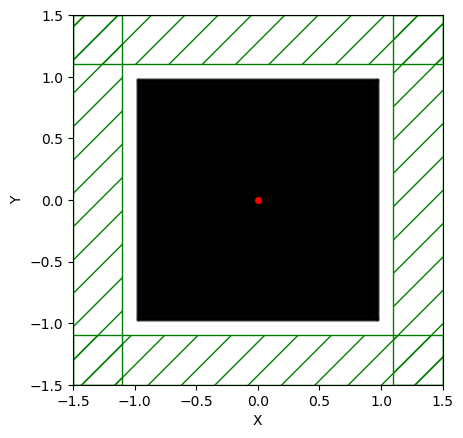

In [169]:
sims.plot2D()

In [ ]:
offset = 0.1
flux_size = 0.2

mn_size = 2

input_flux1 = sims.add_flux(
        fcen, 0, 1,
        mp.FluxRegion(center=sources[0].center - mp.Vector3(offset, 0, 0),
                      size=mp.Vector3(0, flux_size),
                      weight=-1
                      ),
    )

input_flux2 = sims.add_flux(
        fcen, 0, 1,
        mp.FluxRegion(center=sources[0].center + mp.Vector3(offset, 0, 0),
                      size=mp.Vector3(0, flux_size)),
    )

input_flux3 = sims.add_flux(
        fcen, 0, 1,
        mp.FluxRegion(center=sources[0].center - mp.Vector3(0, offset, 0),
                      size=mp.Vector3(flux_size, 0),
                      weight=-1
                      ),
    )

input_flux4 = sims.add_flux(
        fcen, 0, 1,
        mp.FluxRegion(center=sources[0].center + mp.Vector3(0, offset, 0),
                      size=mp.Vector3(flux_size, 0))
    )


TypeError: __init__() got an unexpected keyword argument 'yee_grid'

In [182]:
offset = 0.01
flux_size = 0.02

mn_size = 2

input_flux11 = sims.add_flux(
        fcen, 0, 1,
        mp.FluxRegion(center=sources[0].center - mp.Vector3(offset, 0, 0),
                      size=mp.Vector3(0, flux_size),
                      weight=-1
                      ),
    )

input_flux21 = sims.add_flux(
        fcen, 0, 1,
        mp.FluxRegion(center=sources[0].center + mp.Vector3(offset, 0, 0),
                      size=mp.Vector3(0, flux_size)), yee_grid=True,
    )

input_flux31 = sims.add_flux(
        fcen, 0, 1,
        mp.FluxRegion(center=sources[0].center - mp.Vector3(0, offset, 0),
                      size=mp.Vector3(flux_size, 0),
                      weight=-1
                      ),
    )

input_flux41 = sims.add_flux(
        fcen, 0, 1,
        mp.FluxRegion(center=sources[0].center + mp.Vector3(0, offset, 0),
                      size=mp.Vector3(flux_size, 0))
    )


# output_flux_small = sims.add_flux(
#     fcen, 0, 1,
#         mp.FluxRegion(center=sources[0].center + mp.Vector3(0, 0.5, 0),
#                       size = mp.Vector3(0.02,0,0)),
# )

# output_flux_large = sims.add_flux(
#     fcen, 0, 1,
#         mp.FluxRegion(center=sources[0].center + mp.Vector3(0, 0.5+0.1-0.01, 0),
#                       size = mp.Vector3(0.2,0,0)),
# )

     block, center = (0,0,0)
          size (1e+20,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (1.5,0,0)
          size (1,3,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-1.5,0,0)
          size (1,3,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,1.5,0)
          size (3,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-1.5,0)
          size (3,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<Axes: xlabel='X', ylabel='Y'>

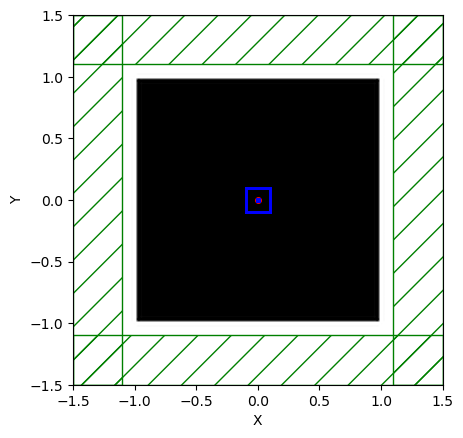

In [183]:
sims.plot2D()

In [184]:
sims.run(until=200)

on time step 20100 (time=201), 0.0191641 s/step


run 2 finished at t = 401.0 (40100 timesteps)


In [102]:
# ### Small size
# print(mp.get_fluxes(input_flux11)[0])
# print(mp.get_fluxes(input_flux21)[0])
# print(mp.get_fluxes(input_flux31)[0])
print(mp.get_fluxes(input_flux41)[0])

0.10721000606340626


In [103]:
# ### Large size
# print(mp.get_fluxes(input_flux1)[0])
# print(mp.get_fluxes(input_flux2)[0])
# print(mp.get_fluxes(input_flux3)[0])
print(mp.get_fluxes(input_flux4)[0])

0.1679505268538246


In [104]:
print(mp.get_fluxes(output_flux_small)[0])
print(mp.get_fluxes(output_flux_large)[0])

0.0042697689181078885
0.03585123290159728


In [105]:
print(mp.get_fluxes(input_flux1)[0]+mp.get_fluxes(input_flux2)[0]+mp.get_fluxes(input_flux3)[0]+mp.get_fluxes(input_flux4)[0])

0.5038515805614738


In [106]:
print(mp.get_fluxes(input_flux11)[0]+mp.get_fluxes(input_flux21)[0]+mp.get_fluxes(input_flux31)[0]+mp.get_fluxes(input_flux41)[0])

0.32163001819021875


In [107]:
0.0042697689181078885/0.10721000606340626

0.03982621655279692

In [108]:
0.03585123290159728/0.1679505268538246

0.2134630570870452

In [178]:
print(mp.get_fluxes(input_flux41)[0])
print(mp.get_fluxes(input_flux4)[0])

0.005214575357955258
0.009226858904350382
